## Pregunta 13

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_data(stocks, start, end):
    prices = yf.download(stocks, start, end, progress = False)["Close"]
    returns = prices.pct_change().dropna()
    mean_returns = returns.mean()
    matriz_cov = returns.cov()
    return mean_returns, matriz_cov, prices

In [3]:
stocks = ['MA','PEP']
weights = [0.5,0.5]
start = '2022-03-10'
end = '2025-03-10'
mean_returns, matriz_cov, prices = get_data(stocks, start, end )

YF.download() has changed argument auto_adjust default to True


### Inciso a)

In [4]:
mean_returns

Ticker
MA     0.000812
PEP    0.000166
dtype: float64

Con los rendimientos medios diarios por acción podemos observar que ambos activos tuvieron un rendimiento positivo durante los ultmos tres años transcurridos. Por el lado de Master Card, este tuvo un rendimiento promedio de 0.08% mientras que Pepsi tuvo un rendimineto promedio de 0.01%. A pesar de que los dos son rendimientos no muy altos, si se puede entender que los dos lograron mantener un rendimiento posistivo durante estos tres años, y si bien pudieron tener subidas y bajdas, desde el 2022 hasta el día de hoy, lograron mantener su valor y no tener pérdidas significastivas reflejadas en su rendimiento. 

 ### Inciso b)

In [5]:
matriz_cov

Ticker,MA,PEP
Ticker,,
MA,0.000186,0.000053
PEP,0.000053,0.000121


Con la matriz de covarianza podemos ver si es que existe una relación entre los activos y como es que es esta relación, para que partir de eso, se puedan tomar decisiones respecto a la relación obtenida. En este caso, al tener MA y Pepsi un valor de 0.000053, significa que esta muy cercano al 0, indicandonos que en realidad existe una relación casi nula entre los dos activos, por lo cual, se puede decir que el movimiento de uno no afecta para nada el movimiento que tenga el otro activo

### Inciso c) 

In [6]:
def simular_precios(mean_returns, matriz_cov, prices, num_dias, stocks, weights):

    N = 1000
    portfolio_return = mean_returns.dot(weights)
    portfolio_simulated_returns = np.full( shape=(num_dias, N), fill_value=0.0 )
    mean_returns = np.full( shape=(num_dias, len(stocks)), fill_value=portfolio_return )
    
    for m in range(N):
        L = np.linalg.cholesky(matriz_cov)
        Z = np.random.normal( size = (num_dias, len(stocks)) )
        daily_returns = mean_returns.T + L.dot(Z.T)
        portfolio_simulated_returns[:,m] =  np.cumprod( np.dot( weights , daily_returns) + 1 )

    return portfolio_simulated_returns

In [7]:
num_dias = 30
portafolios_simulados = simular_precios(mean_returns, matriz_cov, prices, 7, stocks,weights)

In [8]:
max_r = np.max(portafolios_simulados[-1])
min_r = np.min(portafolios_simulados[-1])

values = pd.DataFrame({
    'Valor maximo' : max_r*10000,
    'Valor minimo' : min_r*10000,
}, index =['Portafolios'])

values

,Valor maximo,Valor minimo
Portafolios,10904.205573,9075.040779


### Inciso d)

In [9]:
VaR = np.percentile(portafolios_simulados[-1]-1, 1)
VaR

-0.062405354674249146

El VaR nos muestra que es del 0.06. Esto quiere decir que a 30 días al 1%, se tiene el riesgo de que tu portafolio tenga una perdida de 6.2% en el periodo de tiempo que se especifico. 

### Inciso e)

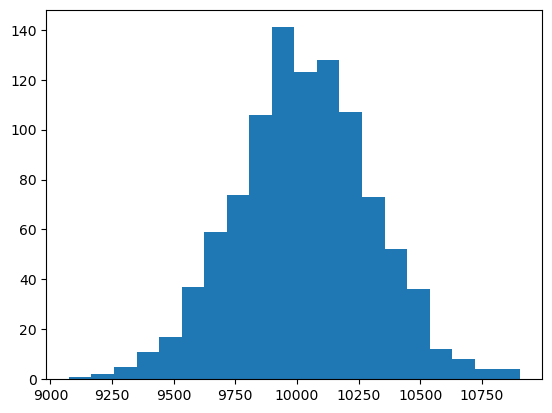

In [10]:
plt.hist((portafolios_simulados[-1]*10000), bins=20)
plt.show()